In [ ]:
import pandas as pd
df = pd.read_csv(
    '/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt', 
    sep=" ::: ", 
    names=['id', 'title', 'genre', 'description'], 
    engine='python',
    skipinitialspace = True)

In [3]:
df.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [4]:
df.shape

(54214, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
df.isna().sum()

id             0
title          0
genre          0
description    0
dtype: int64

In [7]:
df['genre'].unique()

array(['drama', 'thriller', 'adult', 'documentary', 'comedy', 'crime',
       'reality-tv', 'horror', 'sport', 'animation', 'action', 'fantasy',
       'short', 'sci-fi', 'music', 'adventure', 'talk-show', 'western',
       'family', 'mystery', 'history', 'news', 'biography', 'romance',
       'game-show', 'musical', 'war'], dtype=object)

In [8]:
df['genre'].nunique()

27

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


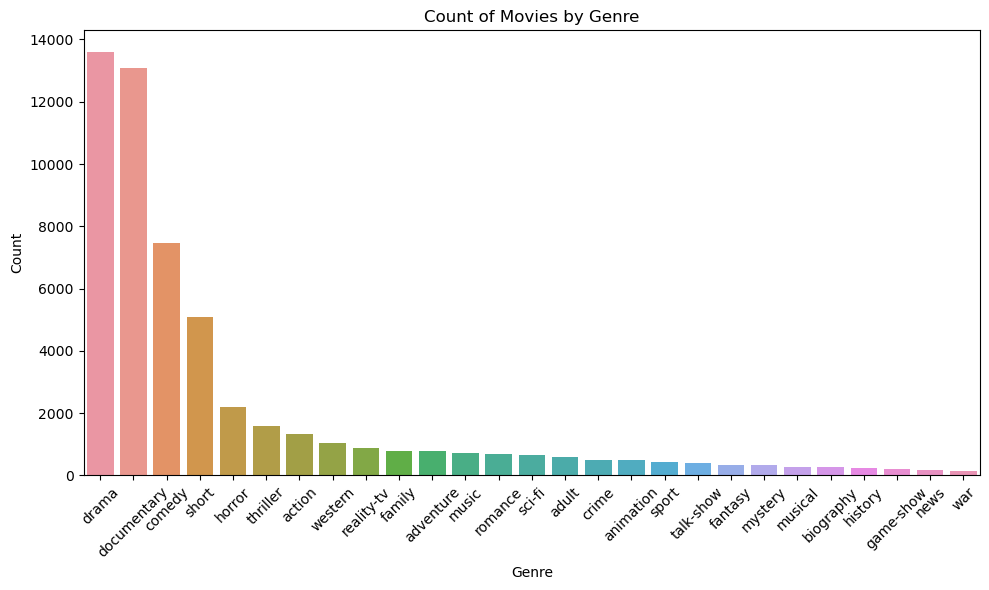

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='genre', order=df['genre'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Count of Movies by Genre")
plt.tight_layout()

# Show the plot
plt.show()




In [10]:
df['length']=df['description'].apply(len)
df.head()

,id,title,genre,description,length
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,545
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,183
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,649
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,1081
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,624


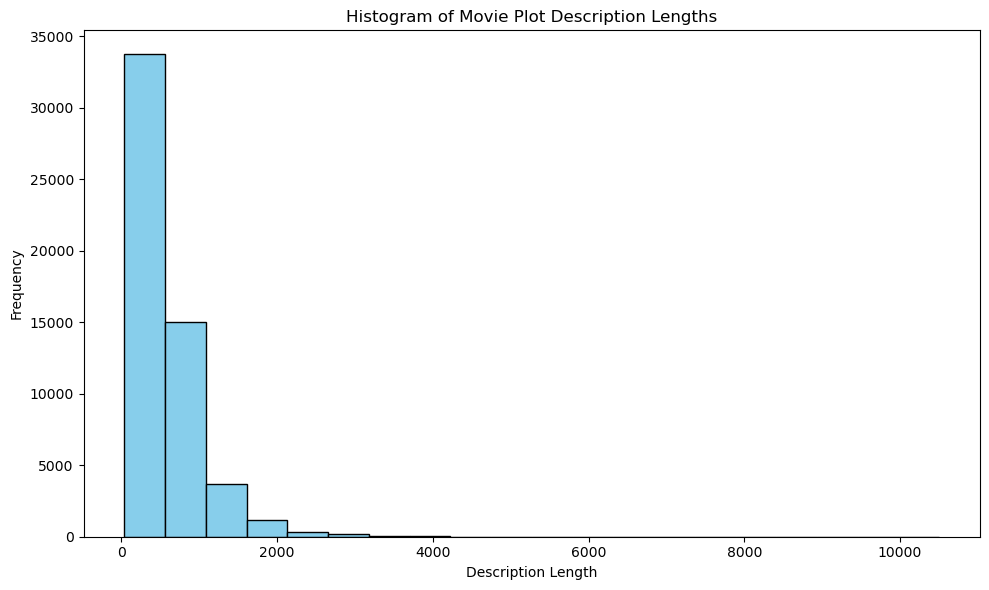

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['length'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Description Length")
plt.ylabel("Frequency")
plt.title("Histogram of Movie Plot Description Lengths")
plt.tight_layout()

# Show the histogram
plt.show()

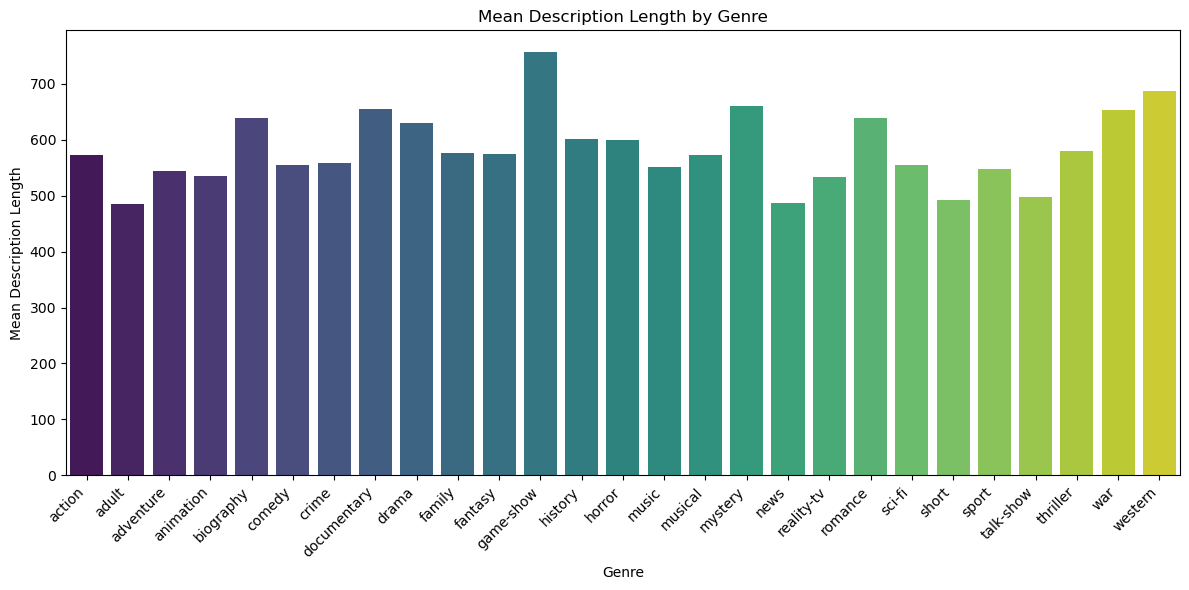

In [12]:
mean_lengths_by_genre = df.groupby('genre')['description'].apply(lambda x: x.str.len().mean()).reset_index()
mean_lengths_by_genre.columns = ['genre', 'mean_description_length']

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=mean_lengths_by_genre, x='genre', y='mean_description_length', palette='viridis')
plt.xlabel("Genre")
plt.ylabel("Mean Description Length")
plt.title("Mean Description Length by Genre")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

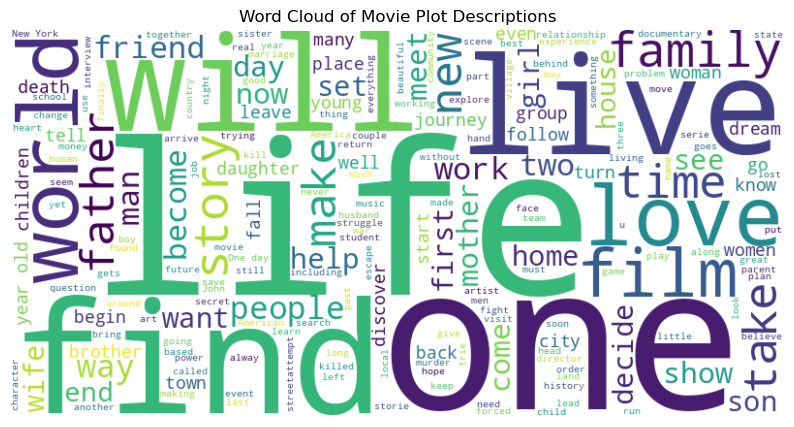

In [13]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all plot descriptions into a single text
all_descriptions = ' '.join(df['description'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Plot Descriptions")
plt.show()

In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
nltk.download('stopwords')
import re
import string
import nltk

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
corpus = []

In [16]:
import re
for i in range(0 ,df.shape[0]):
  message = re.sub('[^a-zA-Z]', ' ' , df['description'][i])
  message = message.lower()
  words = message.split()
  clean_words = [word for word in words if word not  in set(stopwords.words('english'))]
  ps = PorterStemmer()
  words=[ps.stem(word) for word in clean_words]
  text = ' '.join(words)
  corpus.append(text)

In [17]:
corpus

['listen convers doctor parent year old oscar learn nobodi courag tell week live furiou refus speak anyon except straight talk rose ladi pink meet hospit stair christma approach rose use fantast experi profession wrestler imagin wit charm allow oscar live life love full compani friend pop corn einstein bacon childhood sweetheart peggi blue',
 'brother sister past incestu relationship current murder relationship murder women reject murder women get close',
 'bu empti student field trip museum natur histori littl tour guid suspect student anoth tour first lectur film co drift dream erot fantasi one imagin film releas emot fantasi erot uncommon way one slip curat offic littl acquisit anoth find anthropologist see bone identifi even head teacher immun soon tour bu depart everyon admit quit educ',
 'help unemploy father make end meet edith twin sister grace work seamstress invalid grace fall prey temptat chinatown opium becom addict condit worsen misguid physician prescrib morphin eas pain 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=4000,ngram_range=(1, 2))

tfidf_matrix = vectorizer.fit_transform(corpus)

# Convert the TF-IDF matrix to an array
tfidf_array = tfidf_matrix.toarray()


In [19]:
from sklearn.preprocessing import LabelEncoder
y = df['genre']          # Target labels

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the target labels
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([ 8, 24,  1, ...,  7,  5, 12])

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(tfidf_array, y_encoded, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.52


In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test, y_pred)
cm

array([[  28,    0,    0,    0,    0,   12,    0,   50,  157,    0,    0,
           0,    0,    5,    0,    0,    0,    0,    0,    0,    0,    4,
           3,    0,    3,    0,    1],
       [   0,    9,   10,    0,    0,   39,    0,    8,   44,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    2,
           0,    0,    0,    0,    0],
       [   2,    3,    8,    0,    0,   13,    0,   43,   56,    0,    0,
           0,    0,    5,    0,    0,    0,    0,    0,    0,    1,    3,
           0,    0,    1,    0,    4],
       [   1,    0,    0,    0,    0,   16,    0,   39,   43,    0,    0,
           0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    4,
           0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    3,    0,   43,   15,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0],
       [   3,    0,    1,    0,    0,  647,    0,  151,  622,    

<Axes: >

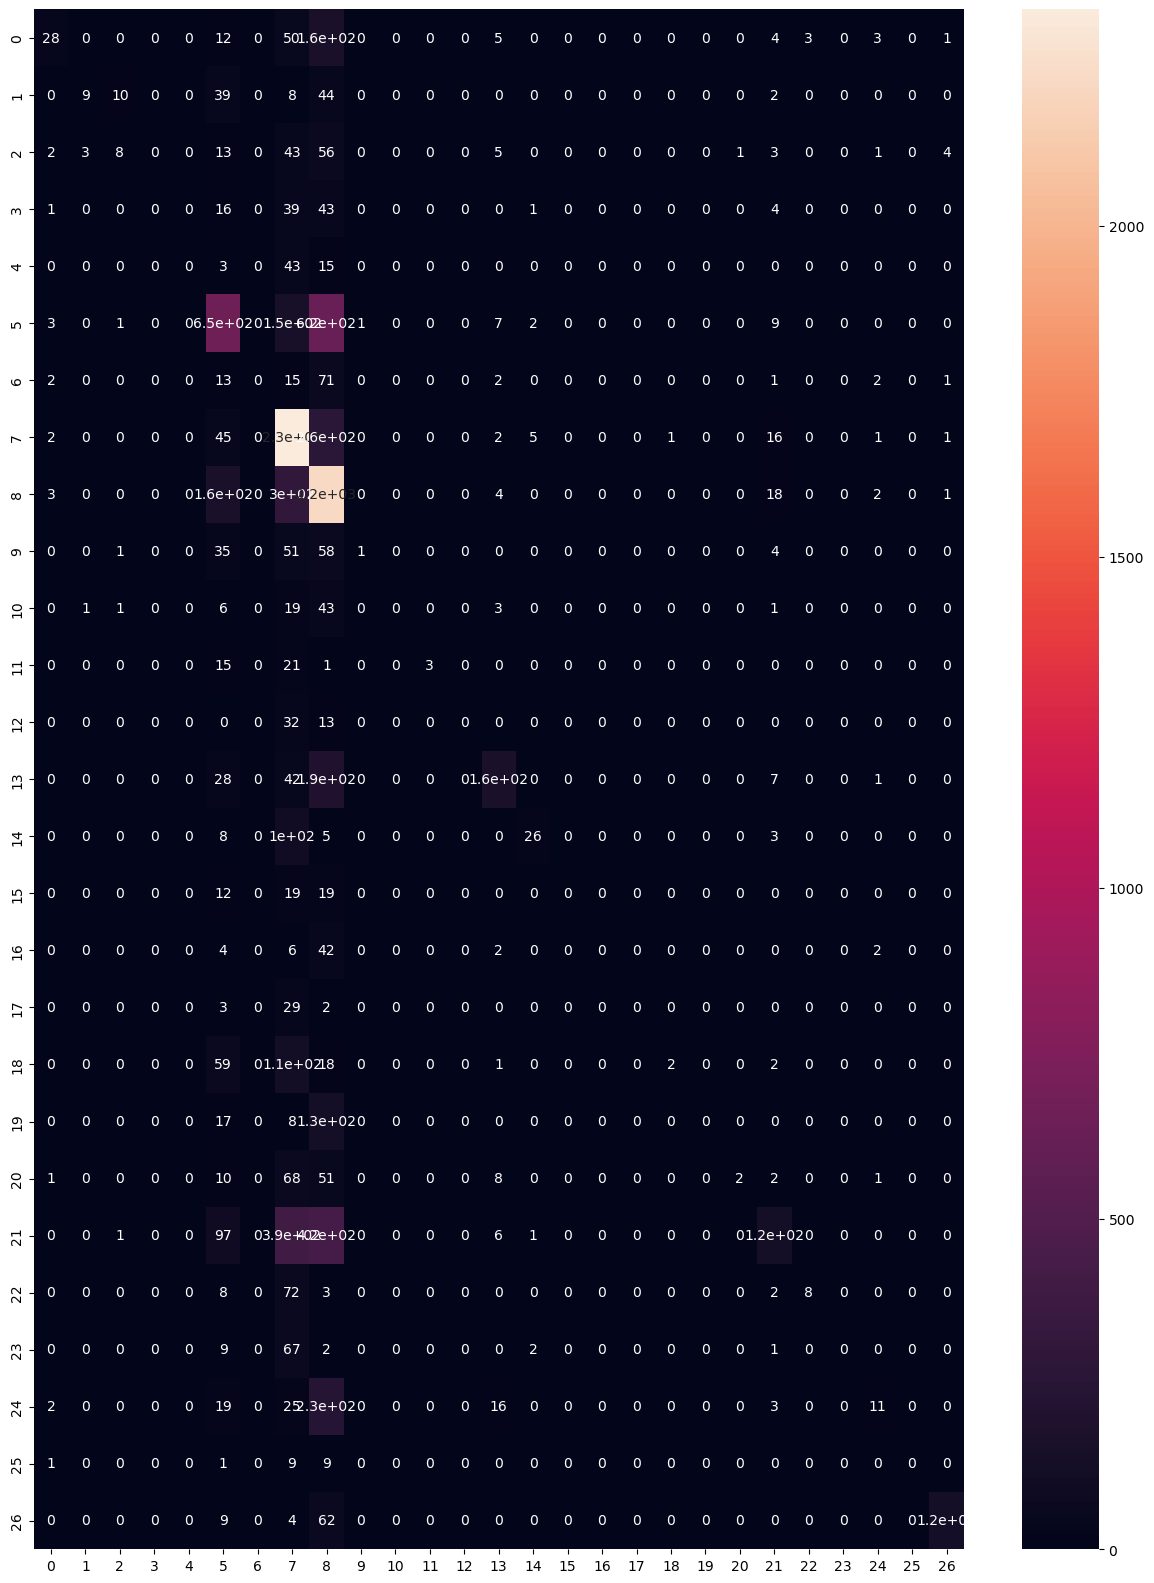

In [22]:
plt.figure(figsize=(15,20))
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(tfidf_array, y_encoded, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = SVC(kernel='linear')  # You can use different kernel functions like 'linear', 'rbf', etc.

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Create a Decision Tree classifier

X_train, X_test, y_train, y_test = train_test_split(tfidf_array, y_encoded, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")